# Detroit Crime Data Analysis

This project analyzes [Detroit crime data](https://data.detroitmi.gov/datasets/8e532daeec1149879bd5e67fdd9c8be0_0/explore?h) from the City of Detroit Open Data Portal. I chose this dataset because it includes multiple features, such as neighborhoods, council districts, dates, and times of incidents, that allow for meaningful exploration and visualization. Note that the dataset lacks accompanying metadata, so some interpretations should be approached with caution.


# Setup


In [1]:
# importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploring


In [2]:
# reading in dataset
crimedata = pd.read_csv("RMS_Crime_Incidents.csv")

C:\Users\haing\AppData\Local\Temp\ipykernel_4428\2063868657.py:2: DtypeWarning: Columns (7,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  crimedata = pd.read_csv("RMS_Crime_Incidents.csv")


In [3]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723088 entries, 0 to 723087
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   X                        722279 non-null  float64
 1   Y                        722279 non-null  float64
 2   incident_entry_id        723088 non-null  object 
 3   nearest_intersection     722279 non-null  object 
 4   offense_category         723088 non-null  object 
 5   offense_description      723088 non-null  object 
 6   state_offense_code       723088 non-null  int64  
 7   arrest_charge            723088 non-null  object 
 8   charge_description       723088 non-null  object 
 9   incident_occurred_at     723088 non-null  object 
 10  incident_time            723088 non-null  object 
 11  incident_day_of_week     723088 non-null  int64  
 12  incident_hour_of_day     723088 non-null  int64  
 13  incident_year            723088 non-null  int64  
 14  case

In [4]:
crimedata.head(5)

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,-83.107336,42.434241,1271798-2402,Penrose St & Charleston St,STOLEN PROPERTY,MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY),2402,24002,MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ON...,2025/04/24 13:44:00+00,...,2504240118,1205,12,2.616351e+14,Penrose,2.0,48203.0,-83.107336,42.434241,1
1,-83.187481,42.394593,1304852-1173,Lyndon St & Strathmoor St,SEXUAL ASSAULT,CSC 1ST DEGREE - ORAL / ANAL,1173,11003,CSC 1ST DEGREE - ORAL / ANAL ...,2025/07/03 12:04:00+00,...,2507060149,0202,02,2.616354e+14,Bethune Community,1.0,48227.0,-83.187481,42.394593,2
2,-83.240016,42.371894,1304614-1302,Plymouth Rd & Stout St,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,1302,13002,AGGRAVATED / FELONIOUS ASSAULT ...,2025/07/06 03:16:00+00,...,2507050376,0603,06,2.616355e+14,Weatherby,7.0,48228.0,-83.240016,42.371894,3
3,-83.237667,42.427205,1304862-3801,Clarita St & Plainview Ave,FAMILY OFFENSE,FAMILY - ABUSE / NEGLECT NONVIOLENT,3801,38001,FAMILY - ABUSE / NEGLECT NONVIOLENT ...,2025/07/06 18:19:00+00,...,2507060200,0807,08,2.616354e+14,Evergreen-Outer Drive,1.0,48219.0,-83.237667,42.427205,4
4,-83.208432,42.428488,188318-2900,Murray Hill St & Clarita St,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,2018/03/11 12:00:00+00,...,1803110085,0808,08,2.616354e+14,College Park,2.0,48235.0,-83.208432,42.428488,5


In [5]:
crimedata.tail(5)

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
723083,-82.973372,42.441689,692325-5001,Tacoma St & Gratiot Ave,OBSTRUCTING JUDICIARY,OBSTRUCTING JUSTICE,5001,50000,OBSTRUCTING JUSTICE,2021/04/14 13:50:00+00,...,2104140077,902,9,2.616350e+14,Franklin,3.0,48205.0,-82.973372,42.441689,723084
723084,-83.219816,42.444195,1084961-1301,S M 39 & W 8 Mile Rd,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2024/02/10 02:30:00+00,...,2402090364,803,8,2.616354e+14,NaN,1.0,NaN,-83.219816,42.444195,723085
723085,-82.993434,42.429315,1129715-1301,Goulburn St & Park Grove St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT ...,2024/05/23 15:28:00+00,...,2405230228,905,9,2.616350e+14,Von Steuben,3.0,48205.0,-82.993434,42.429315,723086
723086,-82.998980,42.445462,811822-1301,Bringard Dr & Strasburg St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2022/05/12 22:49:00+00,...,2205120348,901,9,2.616350e+14,Conner Creek,3.0,48205.0,-82.998980,42.445462,723087
723087,-83.167846,42.380708,723747-1302,Fullerton St & W I 96,AGGRAVATED ASSAULT,AGGRAVATED / FELONIOUS ASSAULT,1302,13002,AGGRAVATED / FELONIOUS ASSAULT,2021/09/30 23:04:00+00,...,2110010006,205,2,2.616353e+14,Grand River-I96,7.0,48238.0,-83.167846,42.380708,723088


In [6]:
crimedata["incident_year"].value_counts()

incident_year
2023    90458
2024    88407
2019    85332
2022    83774
2018    83586
2017    83075
2020    79039
2021    78897
2025    42192
2016     6341
2015      452
2014      317
2013      238
2012      182
2011      134
2010      133
2008       67
2009       64
2002       54
2007       51
2000       45
2001       41
2004       33
2005       26
2006       25
2003       20
1995       10
1991        8
1999        7
1994        5
1978        5
1989        5
1983        4
1997        4
1976        4
1993        4
1977        4
1980        4
1986        4
1979        3
1996        3
1998        3
1990        3
1915        2
1920        2
1992        2
1923        2
1973        2
1918        2
1984        2
1985        2
1988        2
1987        1
1951        1
1961        1
1963        1
1921        1
1974        1
1981        1
Name: count, dtype: int64

In [7]:
# converting "incident_occurred_at" and "incident_time" to datetime format
crimedata["incident_occurred_at"] = pd.to_datetime(crimedata["incident_occurred_at"])
crimedata["incident_time"] = pd.to_datetime(crimedata["incident_time"])

C:\Users\haing\AppData\Local\Temp\ipykernel_4428\235890905.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimedata["incident_time"] = pd.to_datetime(crimedata["incident_time"])


The number of records prior to 2017 is likely not recorded fully, therefore we will simply drop them and focus on the reports from 2017 and on


In [8]:
# dropping rows
crimedata = crimedata[crimedata["incident_year"] > 2016]

In [9]:
# number remaining
print("Number of rows remaining: " + str(len(crimedata)))

Number of rows remaining: 714760


In [10]:
# Since there is no separate month column, let's create one
crimedata["incident_month"] = pd.DatetimeIndex(crimedata["incident_occurred_at"]).month

In [11]:
crimedata.describe()

,X,Y,state_offense_code,incident_time,incident_day_of_week,incident_hour_of_day,incident_year,case_id,crime_id,report_number,census_block_2020_geoid,council_district,zip_code,longitude,latitude,ESRI_OID,incident_month
count,713964.000000,713964.000000,714760.000000,714760,714760.000000,714760.000000,714760.000000,7.147600e+05,7.147600e+05,7.147600e+05,7.119620e+05,707563.000000,708477.000000,713964.000000,713964.000000,714760.000000,714760.000000
mean,-83.107715,42.389885,2397.120042,2025-07-09 12:58:20.396187904,4.013806,12.633145,2020.812410,6.248555e+05,3.624856e+06,2.089942e+09,2.616353e+14,4.000800,48219.001129,-83.107715,42.389885,359983.400998,6.493286
min,-83.287785,42.255442,901.000000,2025-07-09 00:00:00,1.000000,0.000000,2017.000000,8.437000e+03,3.008437e+06,4.000000e+00,2.616350e+14,1.000000,48201.000000,-83.287785,42.255442,1.000000,1.000000
25%,-83.192802,42.359216,1302.000000,2025-07-09 07:49:00,2.000000,7.000000,2019.000000,3.325248e+05,3.332525e+06,1.903120e+09,2.616351e+14,2.000000,48208.000000,-83.192802,42.359216,179991.750000,4.000000
50%,-83.116982,42.394593,2306.000000,2025-07-09 14:00:00,4.000000,14.000000,2021.000000,6.342045e+05,3.634204e+06,2.105250e+09,2.616353e+14,4.000000,48219.000000,-83.116982,42.394593,359673.500000,6.000000
75%,-83.027444,42.422630,2900.000000,2025-07-09 19:00:00,6.000000,19.000000,2023.000000,9.207505e+05,3.920750e+06,2.307040e+09,2.616354e+14,6.000000,48228.000000,-83.027444,42.422630,540167.250000,9.000000
max,-82.910548,42.450253,9915.000000,2025-07-09 23:59:00,7.000000,23.000000,2025.000000,1.206579e+06,4.206579e+06,3.303060e+09,2.616399e+14,7.000000,48243.000000,-82.910548,42.450253,723088.000000,12.000000
std,0.097479,0.038085,1148.544357,NaN,1.993561,7.108472,2.479147,3.424768e+05,3.424768e+05,2.480277e+08,3.860997e+08,2.026728,11.360718,0.097479,0.038085,207994.966808,3.351623


# Data Visualization


## A. Types and Frequencies of crimes


Text(0, 0.5, 'Frequency of Crime')

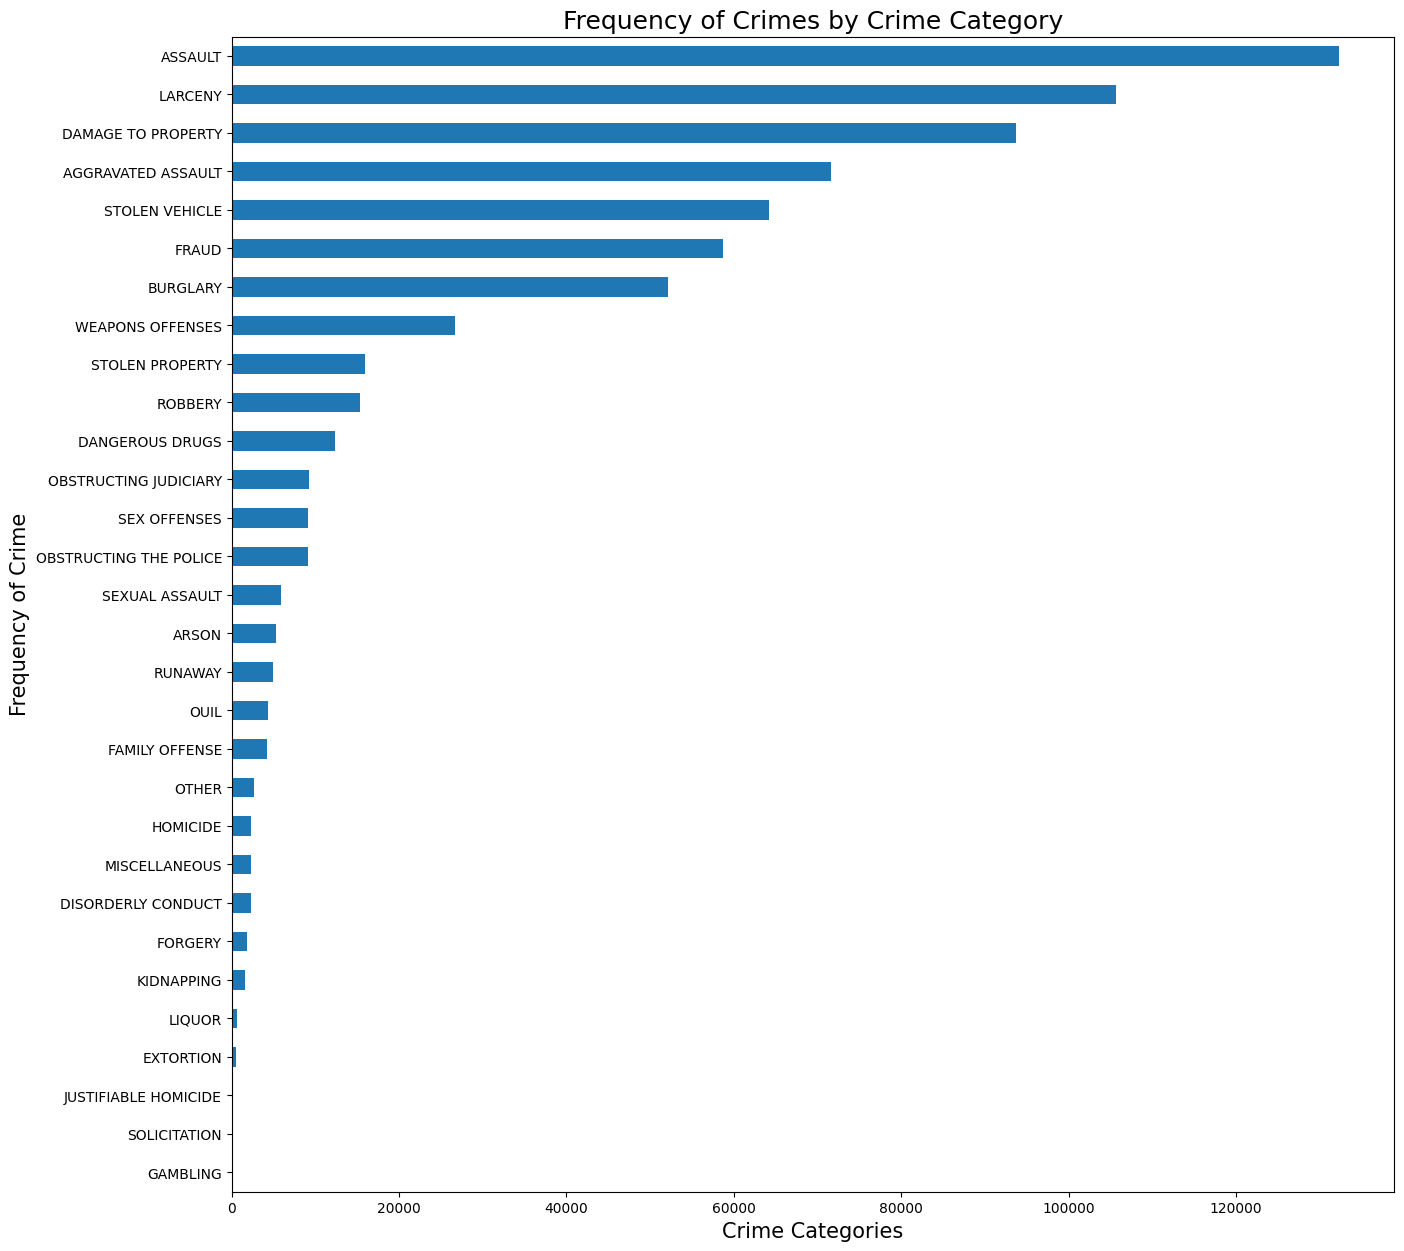

In [12]:
# plotting histogram for scale
fig = plt.figure(figsize=(15, 15))
ax = crimedata["offense_category"].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Frequency of Crimes by Crime Category", fontsize=18)
plt.xlabel("Crime Categories", fontsize=15)
plt.ylabel("Frequency of Crime", fontsize=15)

Assault and lacerny are the top most committed crimes. Combined, they account for about x% of total crimes


## B. Crime over time


C:\Users\haing\AppData\Local\Temp\ipykernel_4428\3904340403.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plot_data = crimedata.groupby(pd.Grouper(key="incident_occurred_at", freq="M")).count()[


Text(0, 0.5, 'Frequency of Crime')

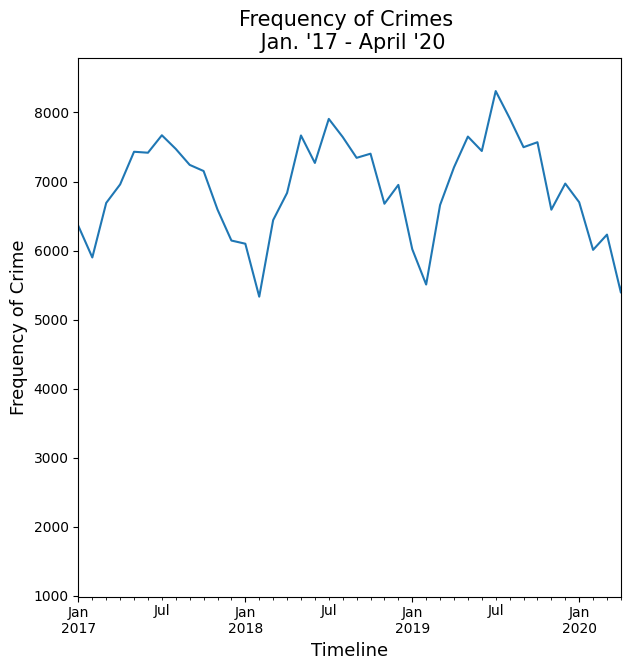

In [13]:
# plotting overall time trend through April of 2020
fig, ax = plt.subplots(figsize=(7, 7))
plot_data = crimedata.groupby(pd.Grouper(key="incident_occurred_at", freq="M")).count()[
    "report_number"
]
ax = plot_data.plot(ax=ax)
ax.set_xlim(["2017-01-01", "2020-4-30"])
plt.title("Frequency of Crimes \n Jan. '17 - April '20", fontsize=15)
plt.xlabel("Timeline", fontsize=13)
plt.ylabel("Frequency of Crime", fontsize=13)

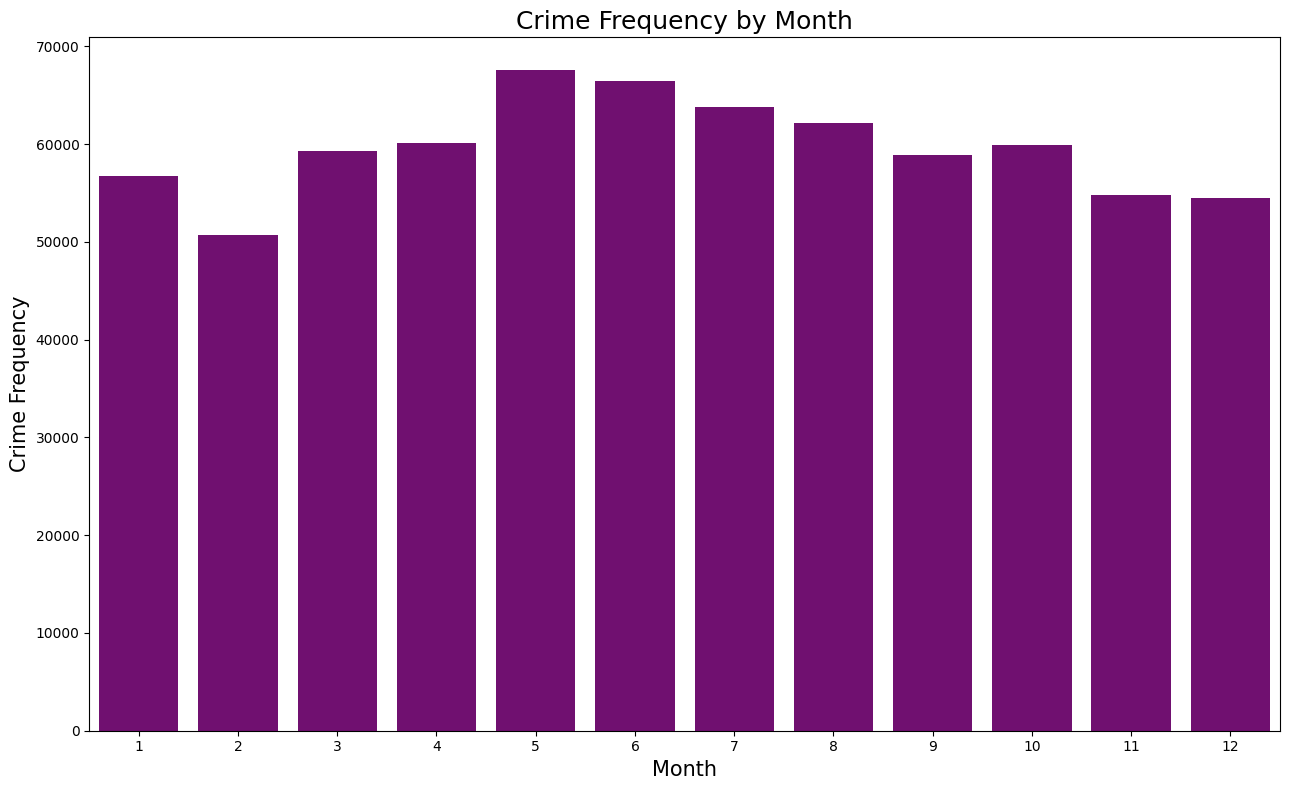

In [14]:
# Pre-aggregate
month_counts = crimedata["incident_month"].value_counts().sort_index()

# Plot using barplot
plt.figure(figsize=(13, 8))
sns.barplot(x=month_counts.index, y=month_counts.values, color="purple")
plt.title("Crime Frequency by Month", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Frequency", fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
# grabbing total crime counts for each day
d1 = (crimedata["incident_day_of_week"] == 1).sum()
d2 = (crimedata["incident_day_of_week"] == 2).sum()
d3 = (crimedata["incident_day_of_week"] == 3).sum()
d4 = (crimedata["incident_day_of_week"] == 4).sum()
d5 = (crimedata["incident_day_of_week"] == 5).sum()
d6 = (crimedata["incident_day_of_week"] == 6).sum()
d7 = (crimedata["incident_day_of_week"] == 7).sum()

C:\Users\haing\AppData\Local\Temp\ipykernel_4428\2146231478.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=["1", "2", "3", "4", "5", "6", "7"])


Text(0.5, 1.0, 'Crime Frequencies by Day of the Week')

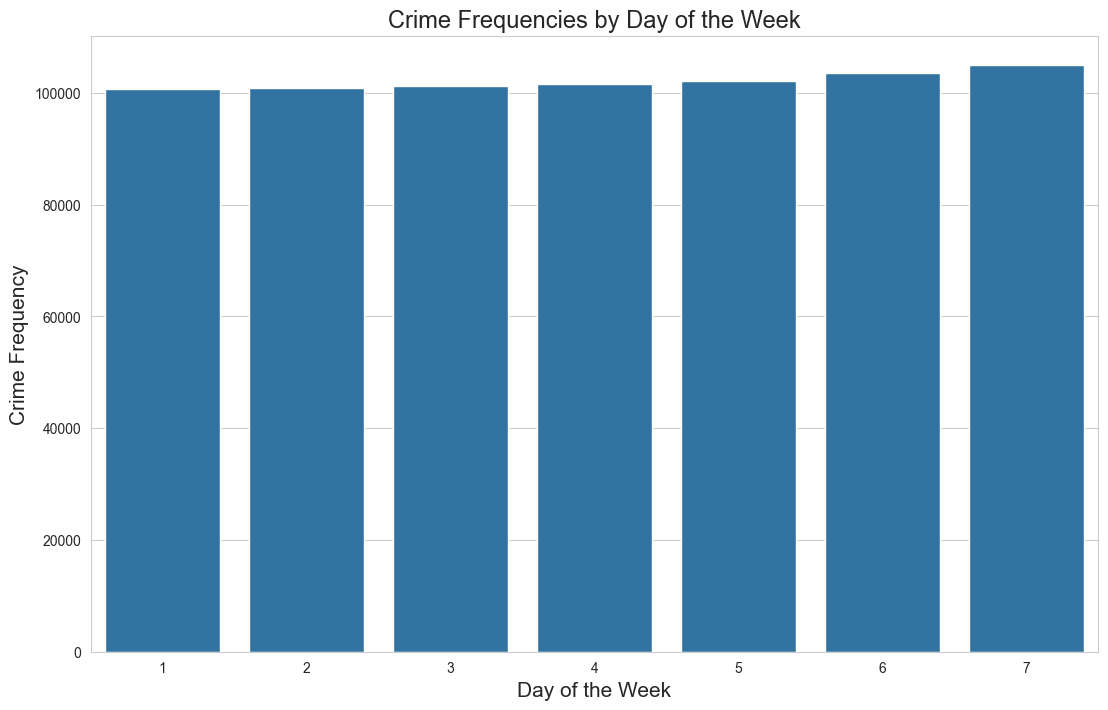

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(13, 8))
g = sns.barplot(x=[d1, d2, d3, d4, d5, d6, d7, d7], y=[d1, d2, d3, d4, d5, d6, d7, d7])
g.set(xticklabels=["1", "2", "3", "4", "5", "6", "7"])
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel("Day of the Week", fontsize=15)
plt.title("Crime Frequencies by Day of the Week", fontsize=17)

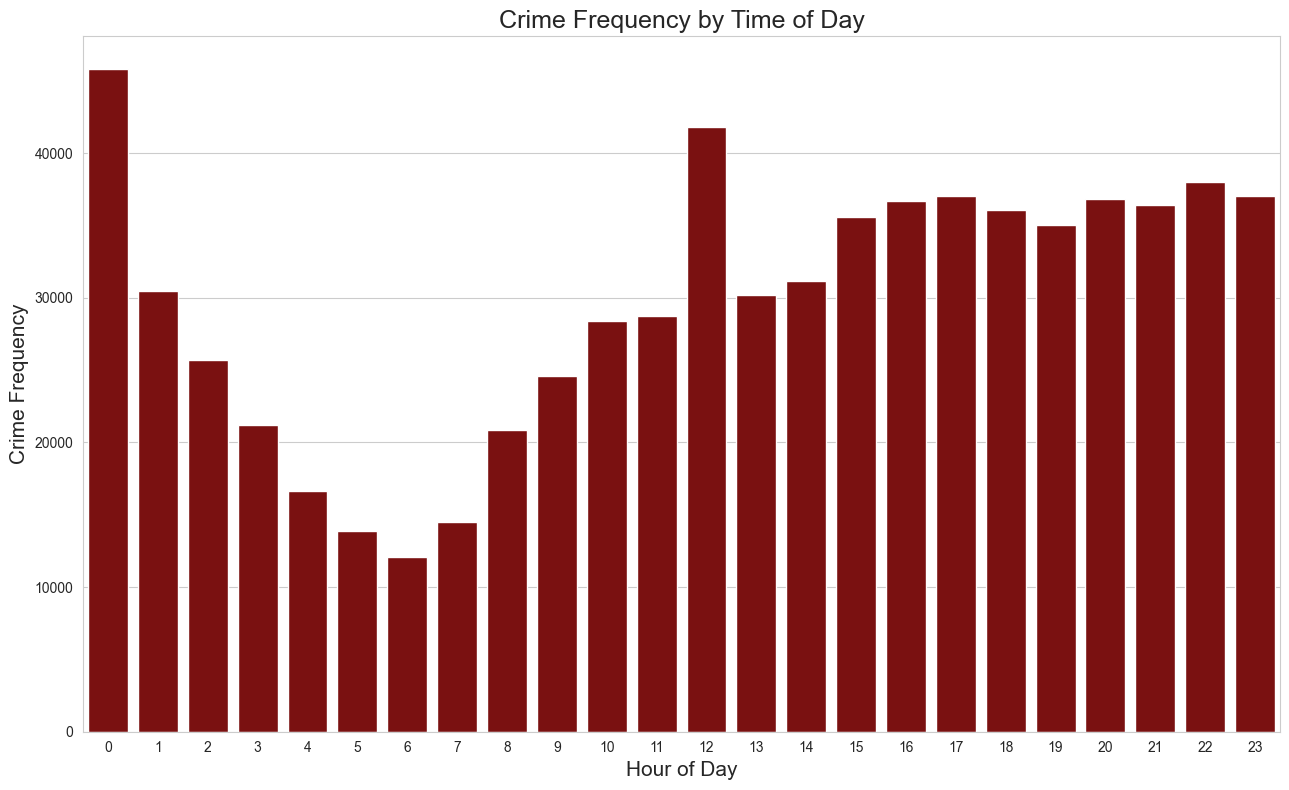

In [17]:
# Pre-aggregate and sort by hour
hour_counts = crimedata["incident_hour_of_day"].value_counts().sort_index()

# Plot
plt.figure(figsize=(13, 8))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color="darkred")
plt.title("Crime Frequency by Time of Day", fontsize=18)
plt.xlabel("Hour of Day", fontsize=15)
plt.ylabel("Crime Frequency", fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
crimedata.groupby("incident_day_of_week")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
)

incident_day_of_week                    
1                     ASSAULT               18815
                      LARCENY               14524
                      DAMAGE TO PROPERTY    13300
                      AGGRAVATED ASSAULT     9960
                      STOLEN VEHICLE         9525
                                            ...  
7                     BURGLARY               6870
                      FRAUD                  6049
                      WEAPONS OFFENSES       3004
                      ROBBERY                2288
                      STOLEN PROPERTY        1748
Name: offense_category, Length: 70, dtype: int64

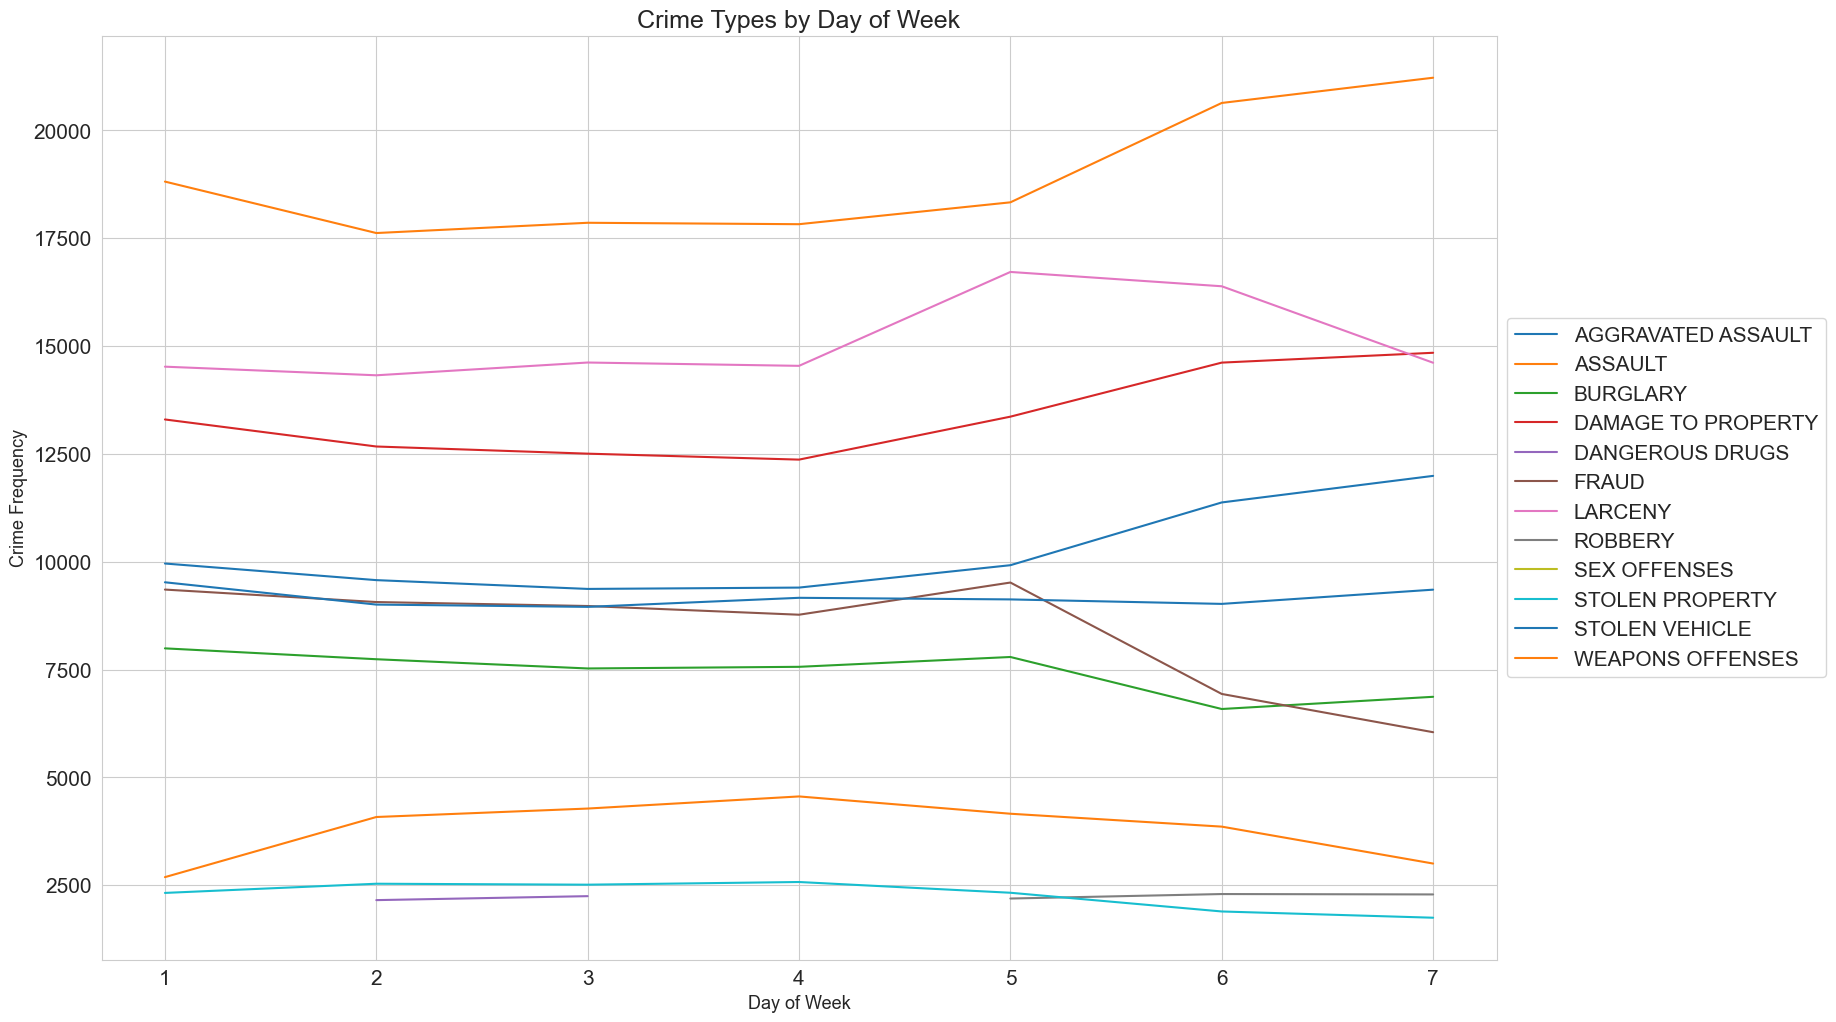

In [19]:
fig, ax = plt.subplots(figsize=(18, 12))
crimedata.groupby("incident_day_of_week")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
).unstack().plot(ax=ax)
plt.title("Crime Types by Day of Week", fontsize=18)
ax.set_xlabel("Day of Week", fontsize=13)
ax.set_ylabel("Crime Frequency", fontsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

In [20]:
crimedata.groupby("incident_hour_of_day")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
)

incident_hour_of_day                        
0                     ASSAULT                   8118
                      LARCENY                   6147
                      DAMAGE TO PROPERTY        5926
                      FRAUD                     5000
                      AGGRAVATED ASSAULT        4725
                                                ... 
23                    WEAPONS OFFENSES          2150
                      BURGLARY                  1626
                      ROBBERY                    945
                      FRAUD                      860
                      OBSTRUCTING THE POLICE     610
Name: offense_category, Length: 240, dtype: int64

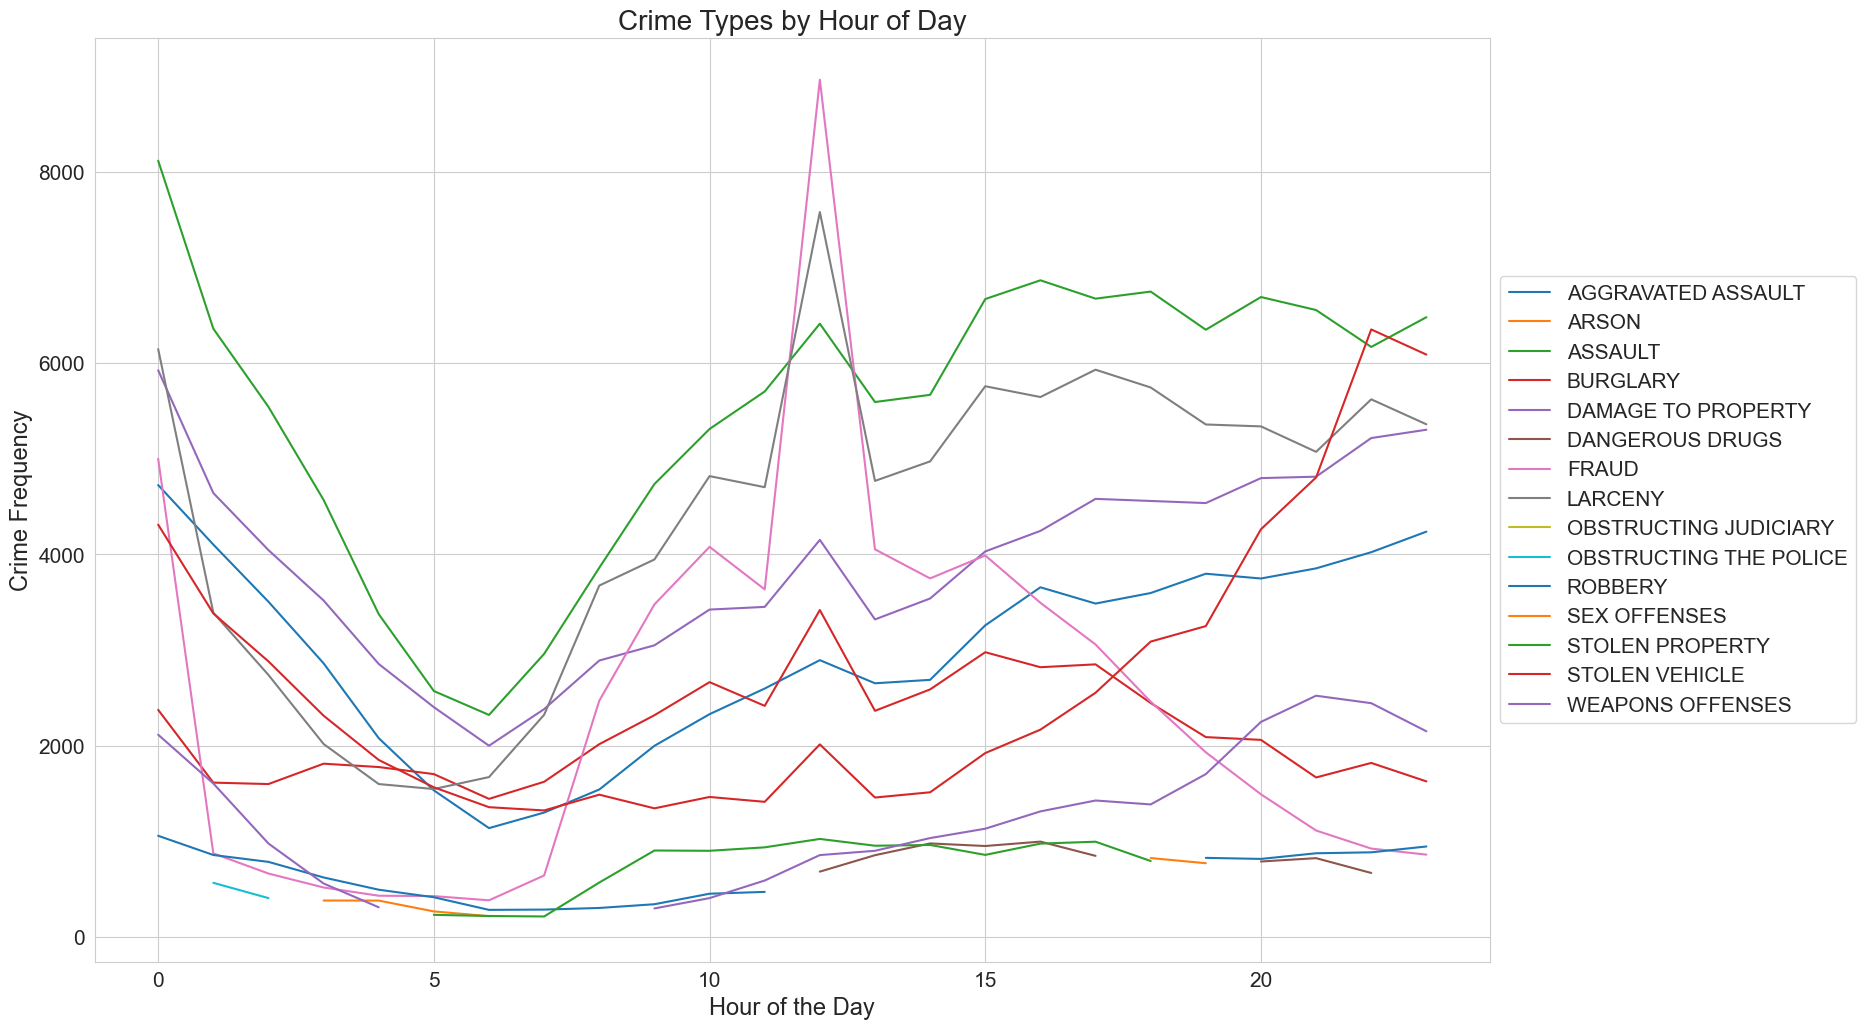

In [21]:
fig, ax = plt.subplots(figsize=(18, 12))
crimedata.groupby("incident_hour_of_day")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
).unstack().plot(ax=ax)
plt.title("Crime Types by Hour of Day", fontsize=20)
ax.set_xlabel("Hour of the Day", fontsize=17)
ax.set_ylabel("Crime Frequency", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

In [22]:
crimedata.groupby("incident_month")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
)

incident_month                    
1               ASSAULT               10151
                LARCENY                8488
                DAMAGE TO PROPERTY     7310
                STOLEN VEHICLE         5361
                FRAUD                  5304
                                      ...  
12              FRAUD                  4436
                BURGLARY               4390
                WEAPONS OFFENSES       1794
                STOLEN PROPERTY        1325
                ROBBERY                1199
Name: offense_category, Length: 120, dtype: int64

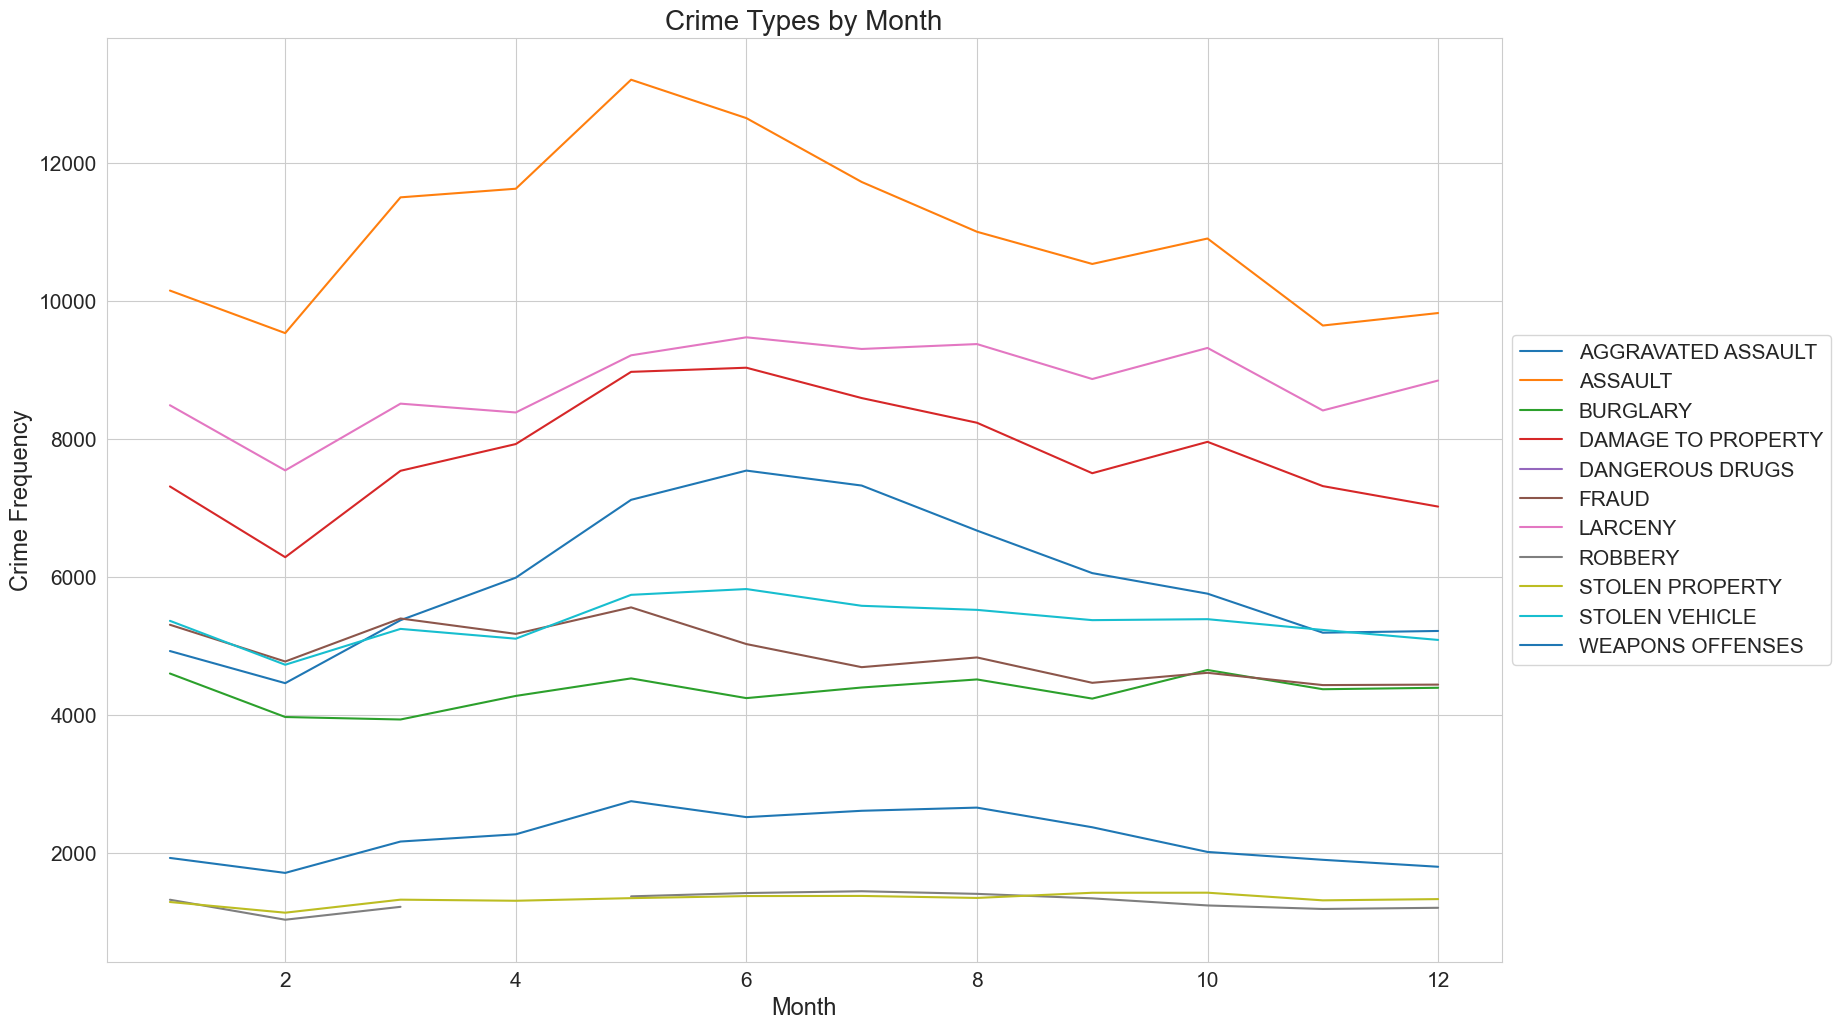

In [23]:
fig, ax = plt.subplots(figsize=(18, 12))
crimedata.groupby("incident_month")["offense_category"].apply(
    lambda x: x.value_counts().head(10)
).unstack().plot(ax=ax)
plt.title("Crime Types by Month", fontsize=20)
ax.set_xlabel("Month", fontsize=17)
ax.set_ylabel("Crime Frequency", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

## C. Crime Trends by Neighbourhood and Council District


In [24]:
# selecting top 20
top20_neigh = crimedata["neighborhood"].value_counts()[0:20]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Warrendale'),
  Text(0, 1, 'Downtown'),
  Text(0, 2, 'Franklin Park'),
  Text(0, 3, 'Midtown'),
  Text(0, 4, 'Bethune Community'),
  Text(0, 5, 'Outer Drive-Hayes'),
  Text(0, 6, 'Brightmoor'),
  Text(0, 7, 'Regent Park'),
  Text(0, 8, 'Barton-McFarland'),
  Text(0, 9, 'Dexter-Linwood'),
  Text(0, 10, 'Oakman Blvd Community'),
  Text(0, 11, 'Claytown'),
  Text(0, 12, 'Morningside'),
  Text(0, 13, 'Cornerstone Village'),
  Text(0, 14, 'Midwest'),
  Text(0, 15, 'Nolan'),
  Text(0, 16, 'Bagley'),
  Text(0, 17, 'Central Southwest'),
  Text(0, 18, 'Springwells'),
  Text(0, 19, 'Mapleridge')])

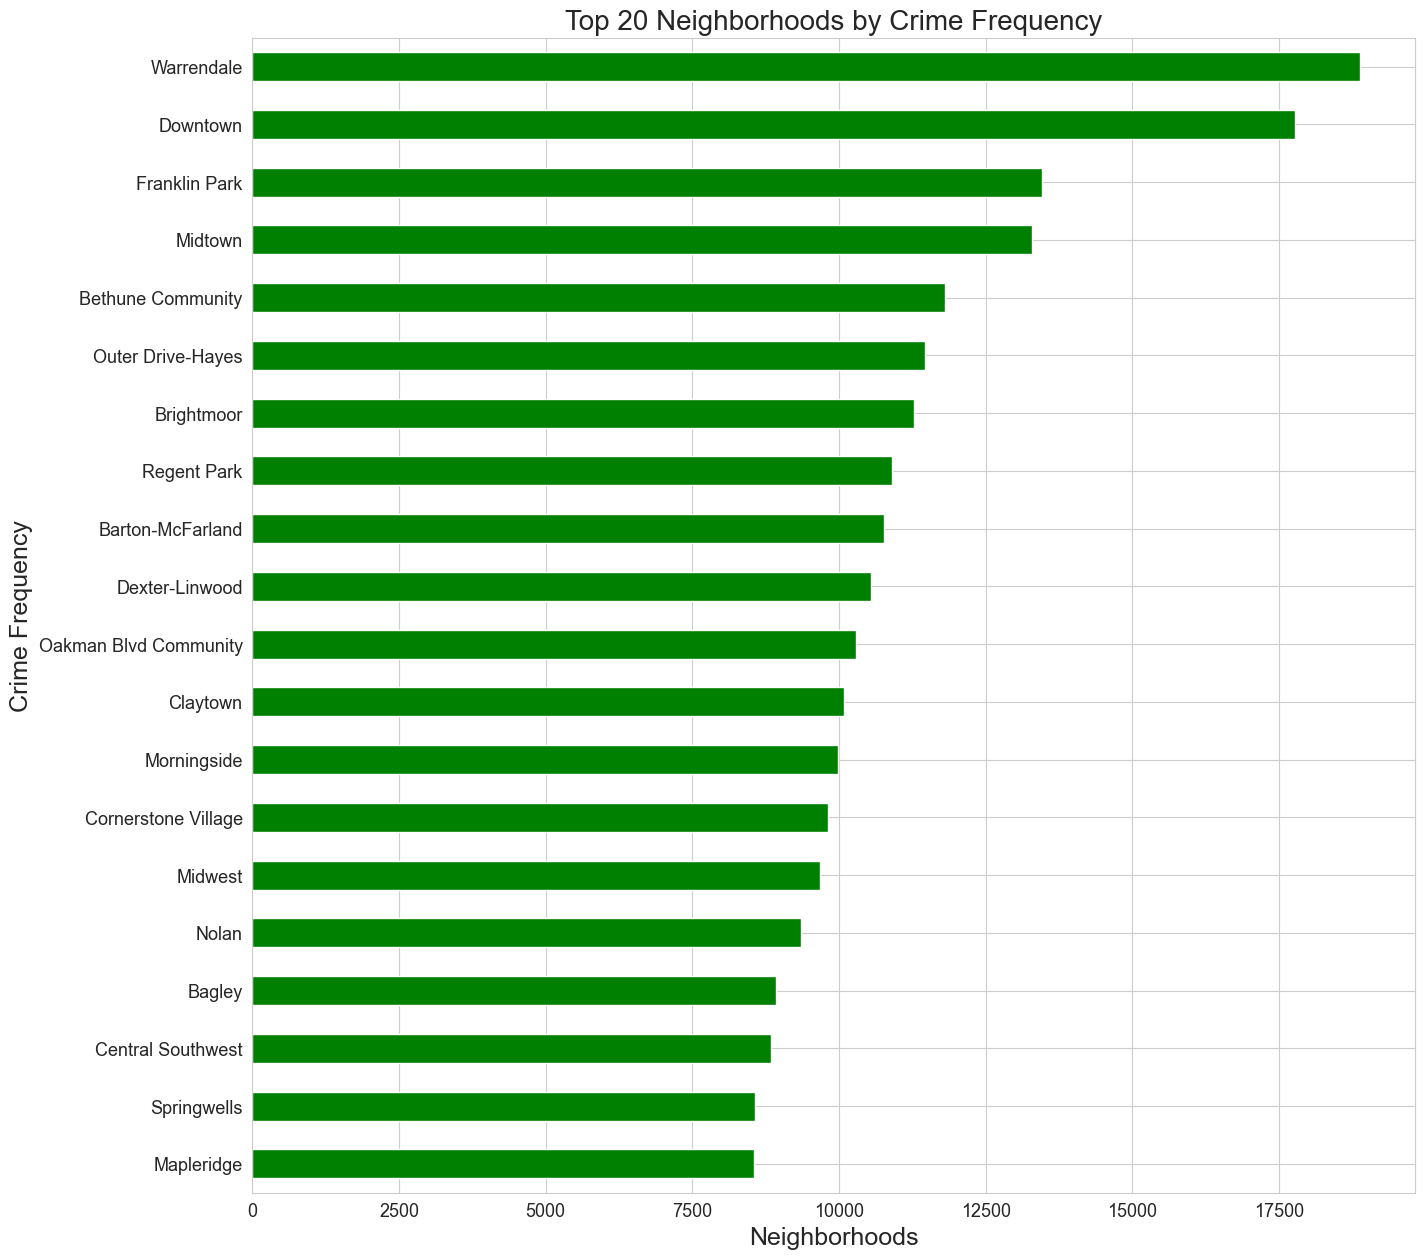

In [25]:
fig = plt.figure(figsize=(15, 15))
ax = top20_neigh.plot(kind="barh", color="green")
plt.gca().invert_yaxis()
plt.title("Top 20 Neighborhoods by Crime Frequency", fontsize=20)
plt.xlabel("Neighborhoods", fontsize=18)
plt.ylabel("Crime Frequency", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

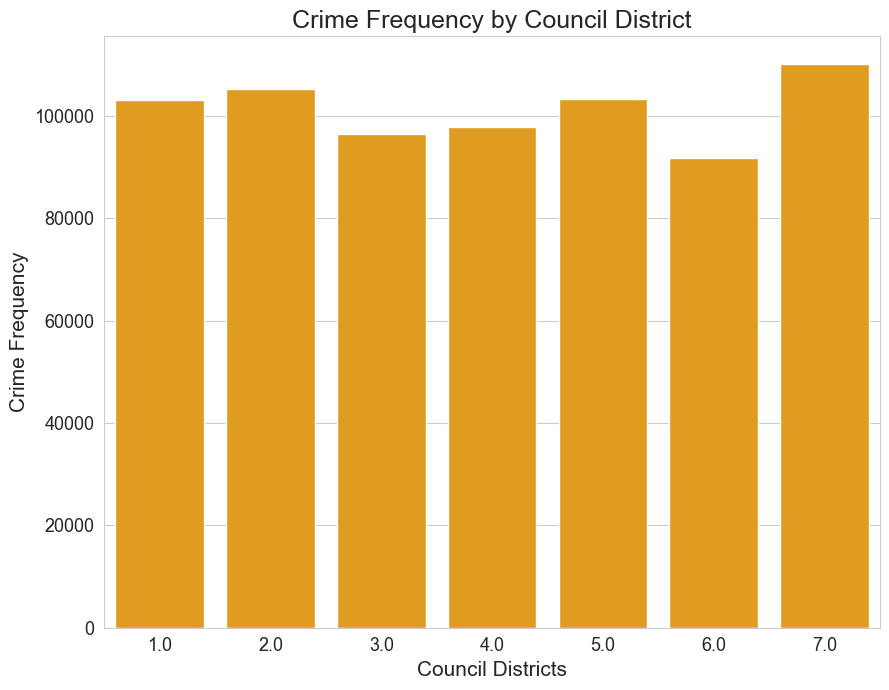

In [26]:
# Pre-aggregate council district counts
district_counts = crimedata["council_district"].value_counts().sort_index()

# Plot
plt.figure(figsize=(9, 7))
sns.barplot(x=district_counts.index, y=district_counts.values, color="orange")
plt.title("Crime Frequency by Council District", fontsize=18)
plt.xlabel("Council Districts", fontsize=15)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

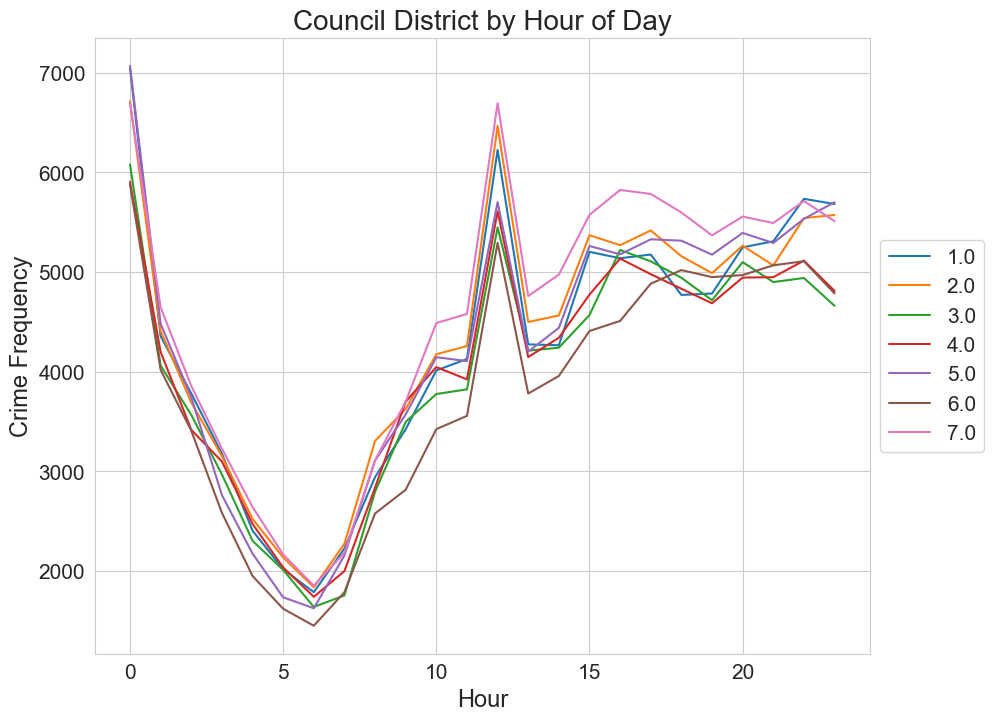

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
crimedata.groupby("incident_hour_of_day")["council_district"].apply(
    lambda x: x.value_counts().head(10)
).unstack().plot(ax=ax)
plt.title("Council District by Hour of Day", fontsize=20)
ax.set_xlabel("Hour", fontsize=17)
ax.set_ylabel("Crime Frequency", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

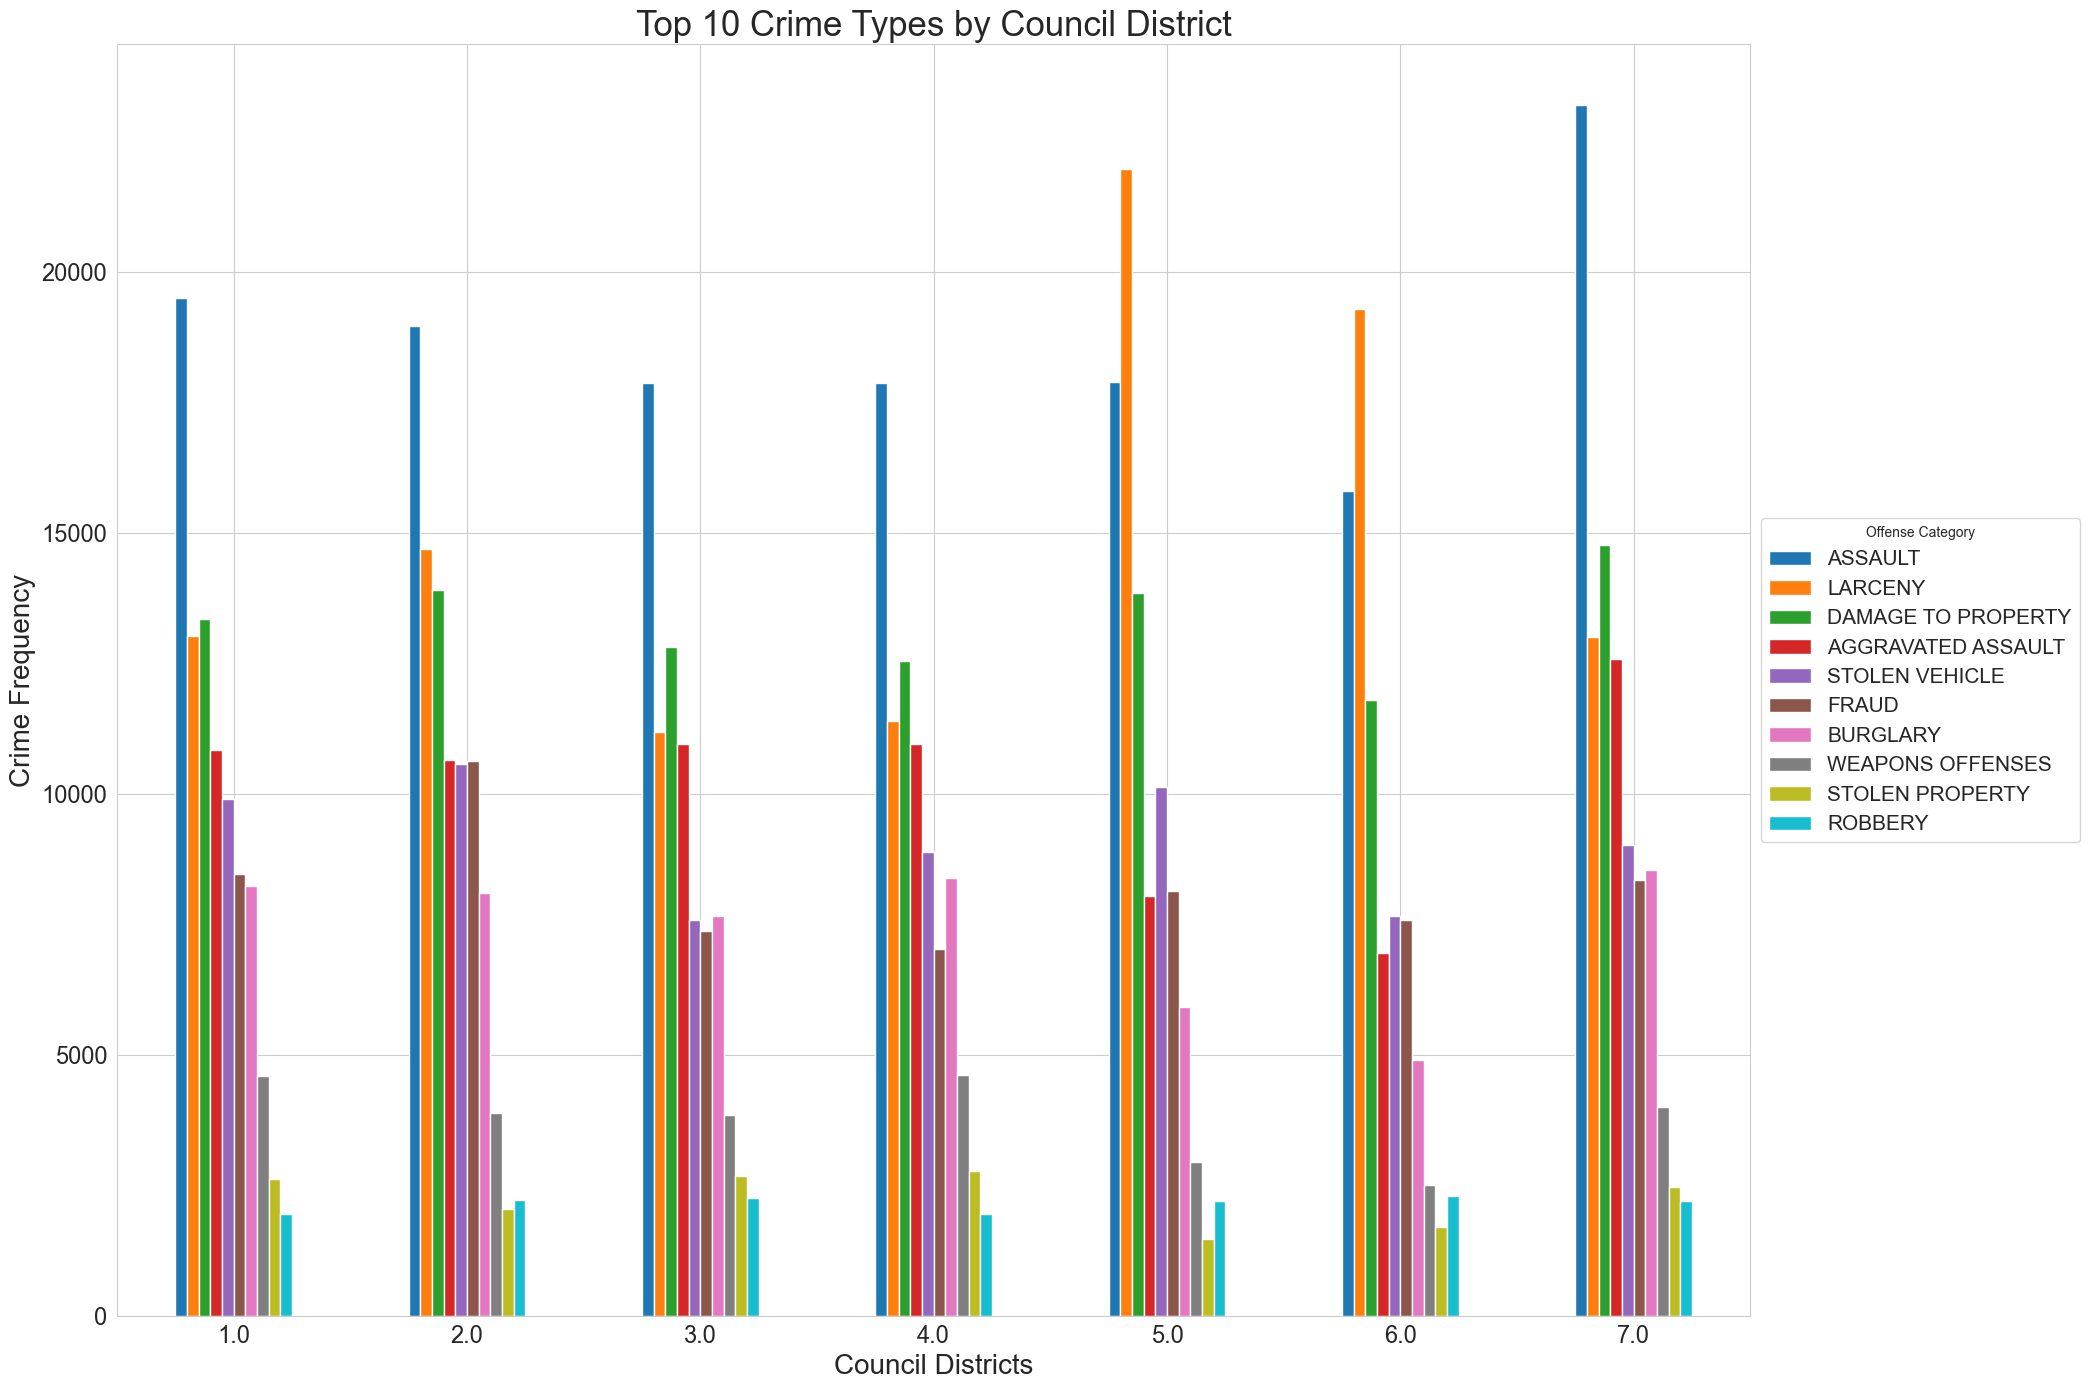

In [ ]:
# Get top 10 crimes overall (not per district) to ensure consistency across districts
top_10 = crimedata["offense_category"].value_counts().head(10).index

# Filter dataset to only include top 10 offense categories
filtered = crimedata[crimedata["offense_category"].isin(top_10)]

# Create a frequency table: rows=council_districts, columns=offense_category
grouped = (
    filtered.groupby(["council_district", "offense_category"])
    .size()
    .unstack(fill_value=0)[top_10]  # maintain consistent column order
)

# Plot clustered bar chart
grouped.plot(kind="bar", figsize=(21, 14))  # default is clustered

# Styling
plt.title("Top 10 Crime Types by Council District", fontsize=25)
plt.xlabel("Council Districts", fontsize=20)
plt.ylabel("Crime Frequency", fontsize=20)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.legend(
    title="Offense Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    prop={"size": 15},
)
plt.tight_layout()
plt.show()

## D. Examine Dangerous Drugs, Aggravated Assault, Sex Offenses and Homicide across council districts


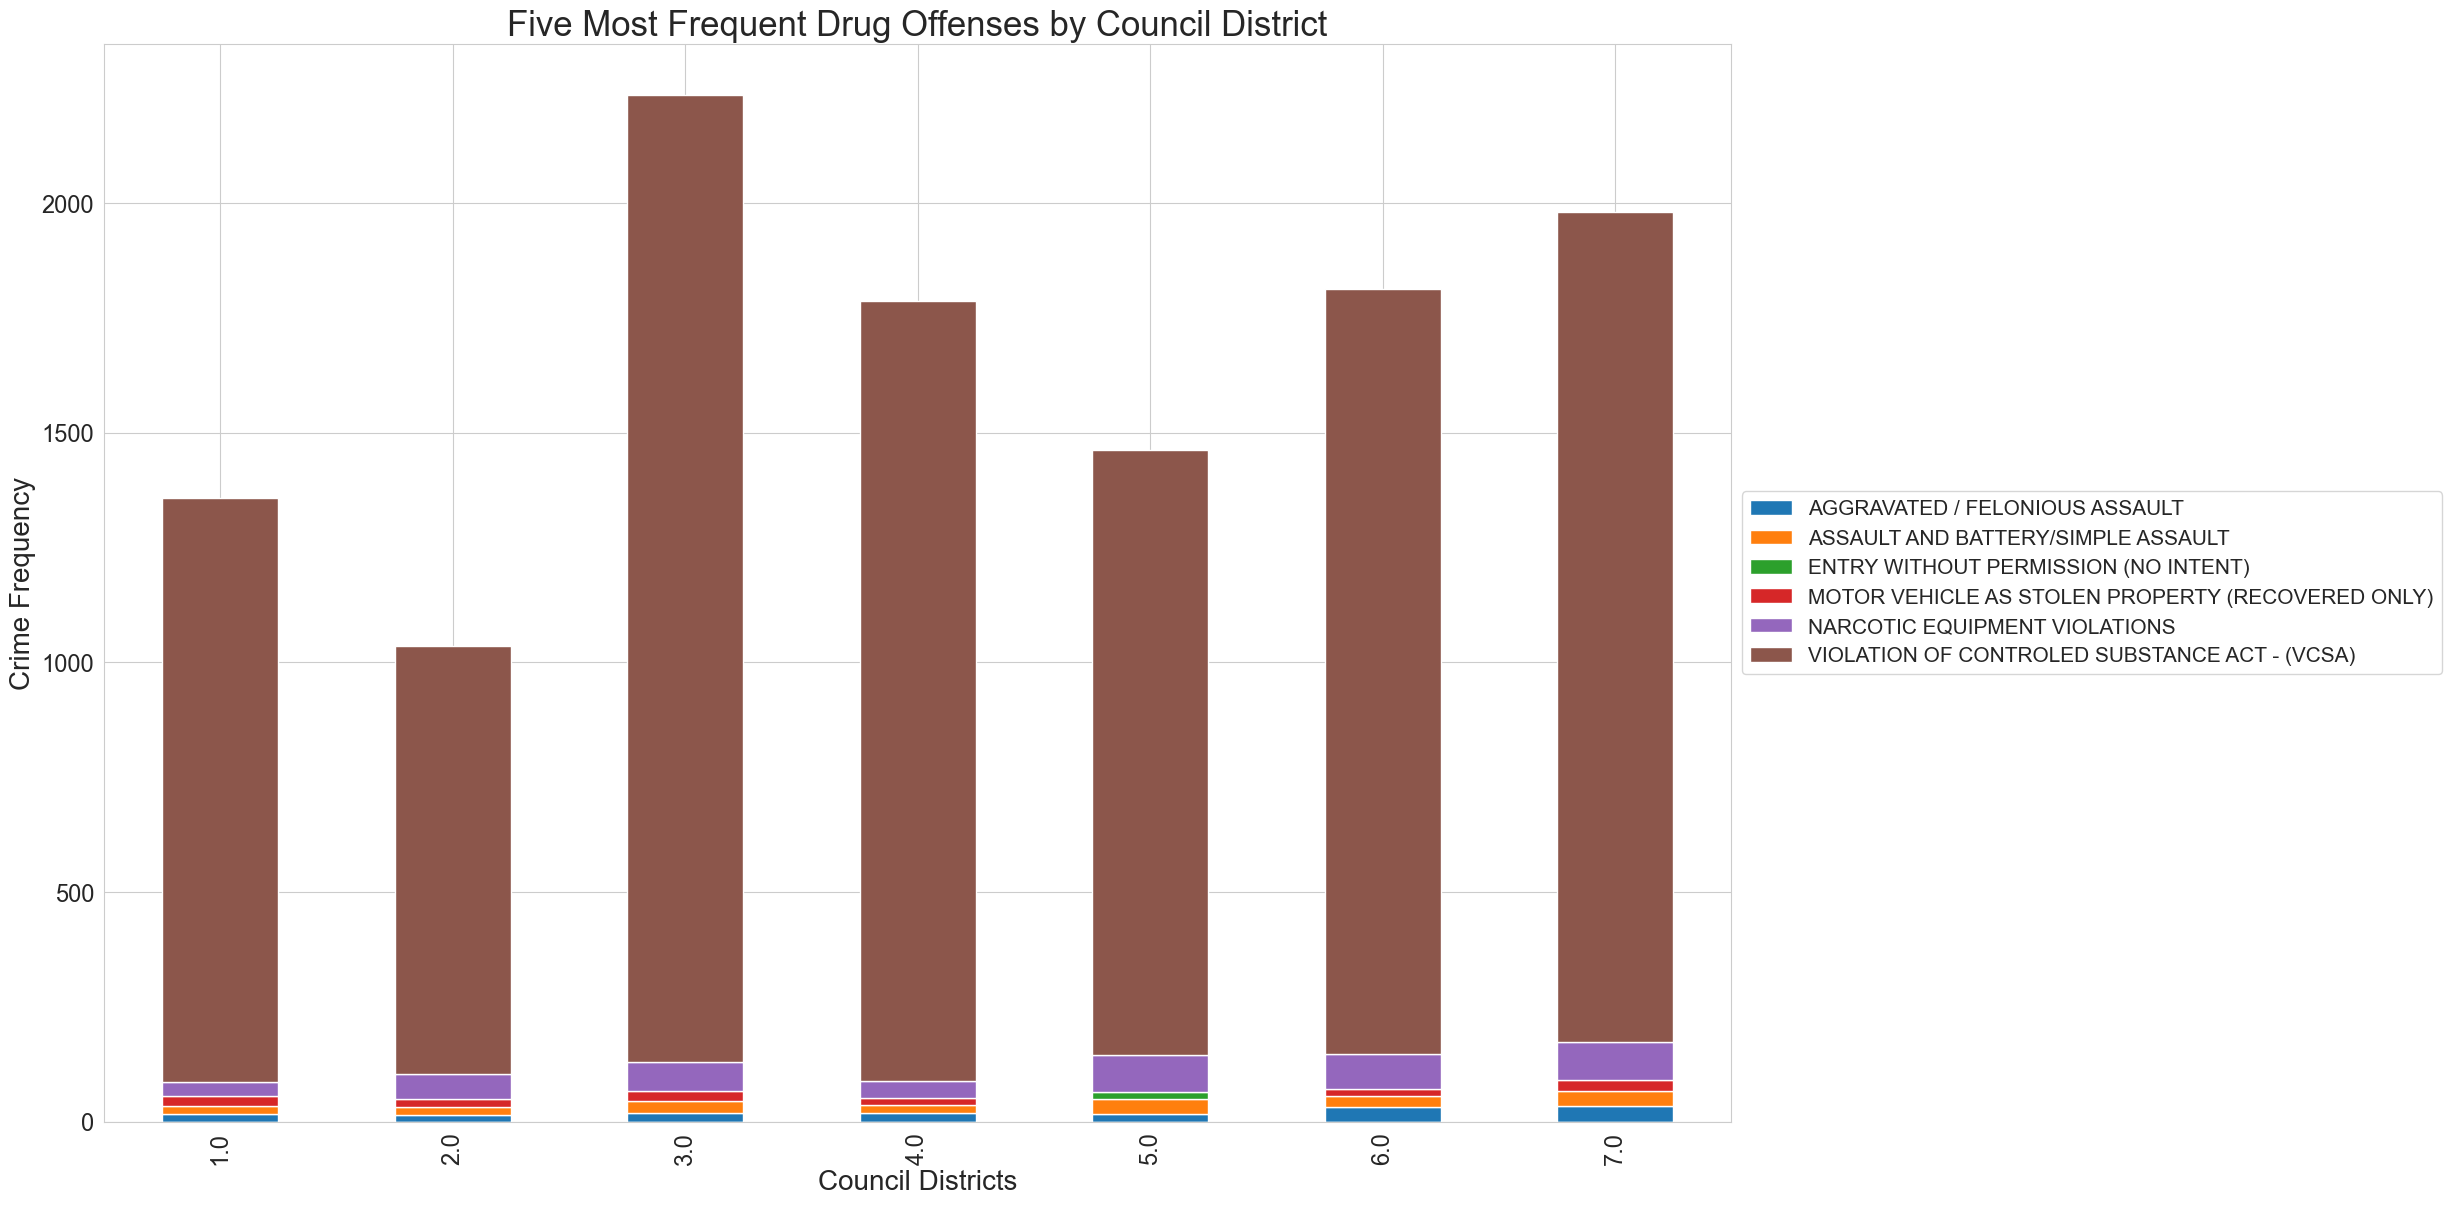

In [30]:
crimedata[crimedata.offense_category == "DANGEROUS DRUGS"].groupby(
    "council_district"
).offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(
    stacked=True, figsize=(21, 14)
)
plt.title("Five Most Frequent Drug Offenses by Council District", fontsize=25)
plt.xlabel("Council Districts", fontsize=20)
plt.ylabel("Crime Frequency", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

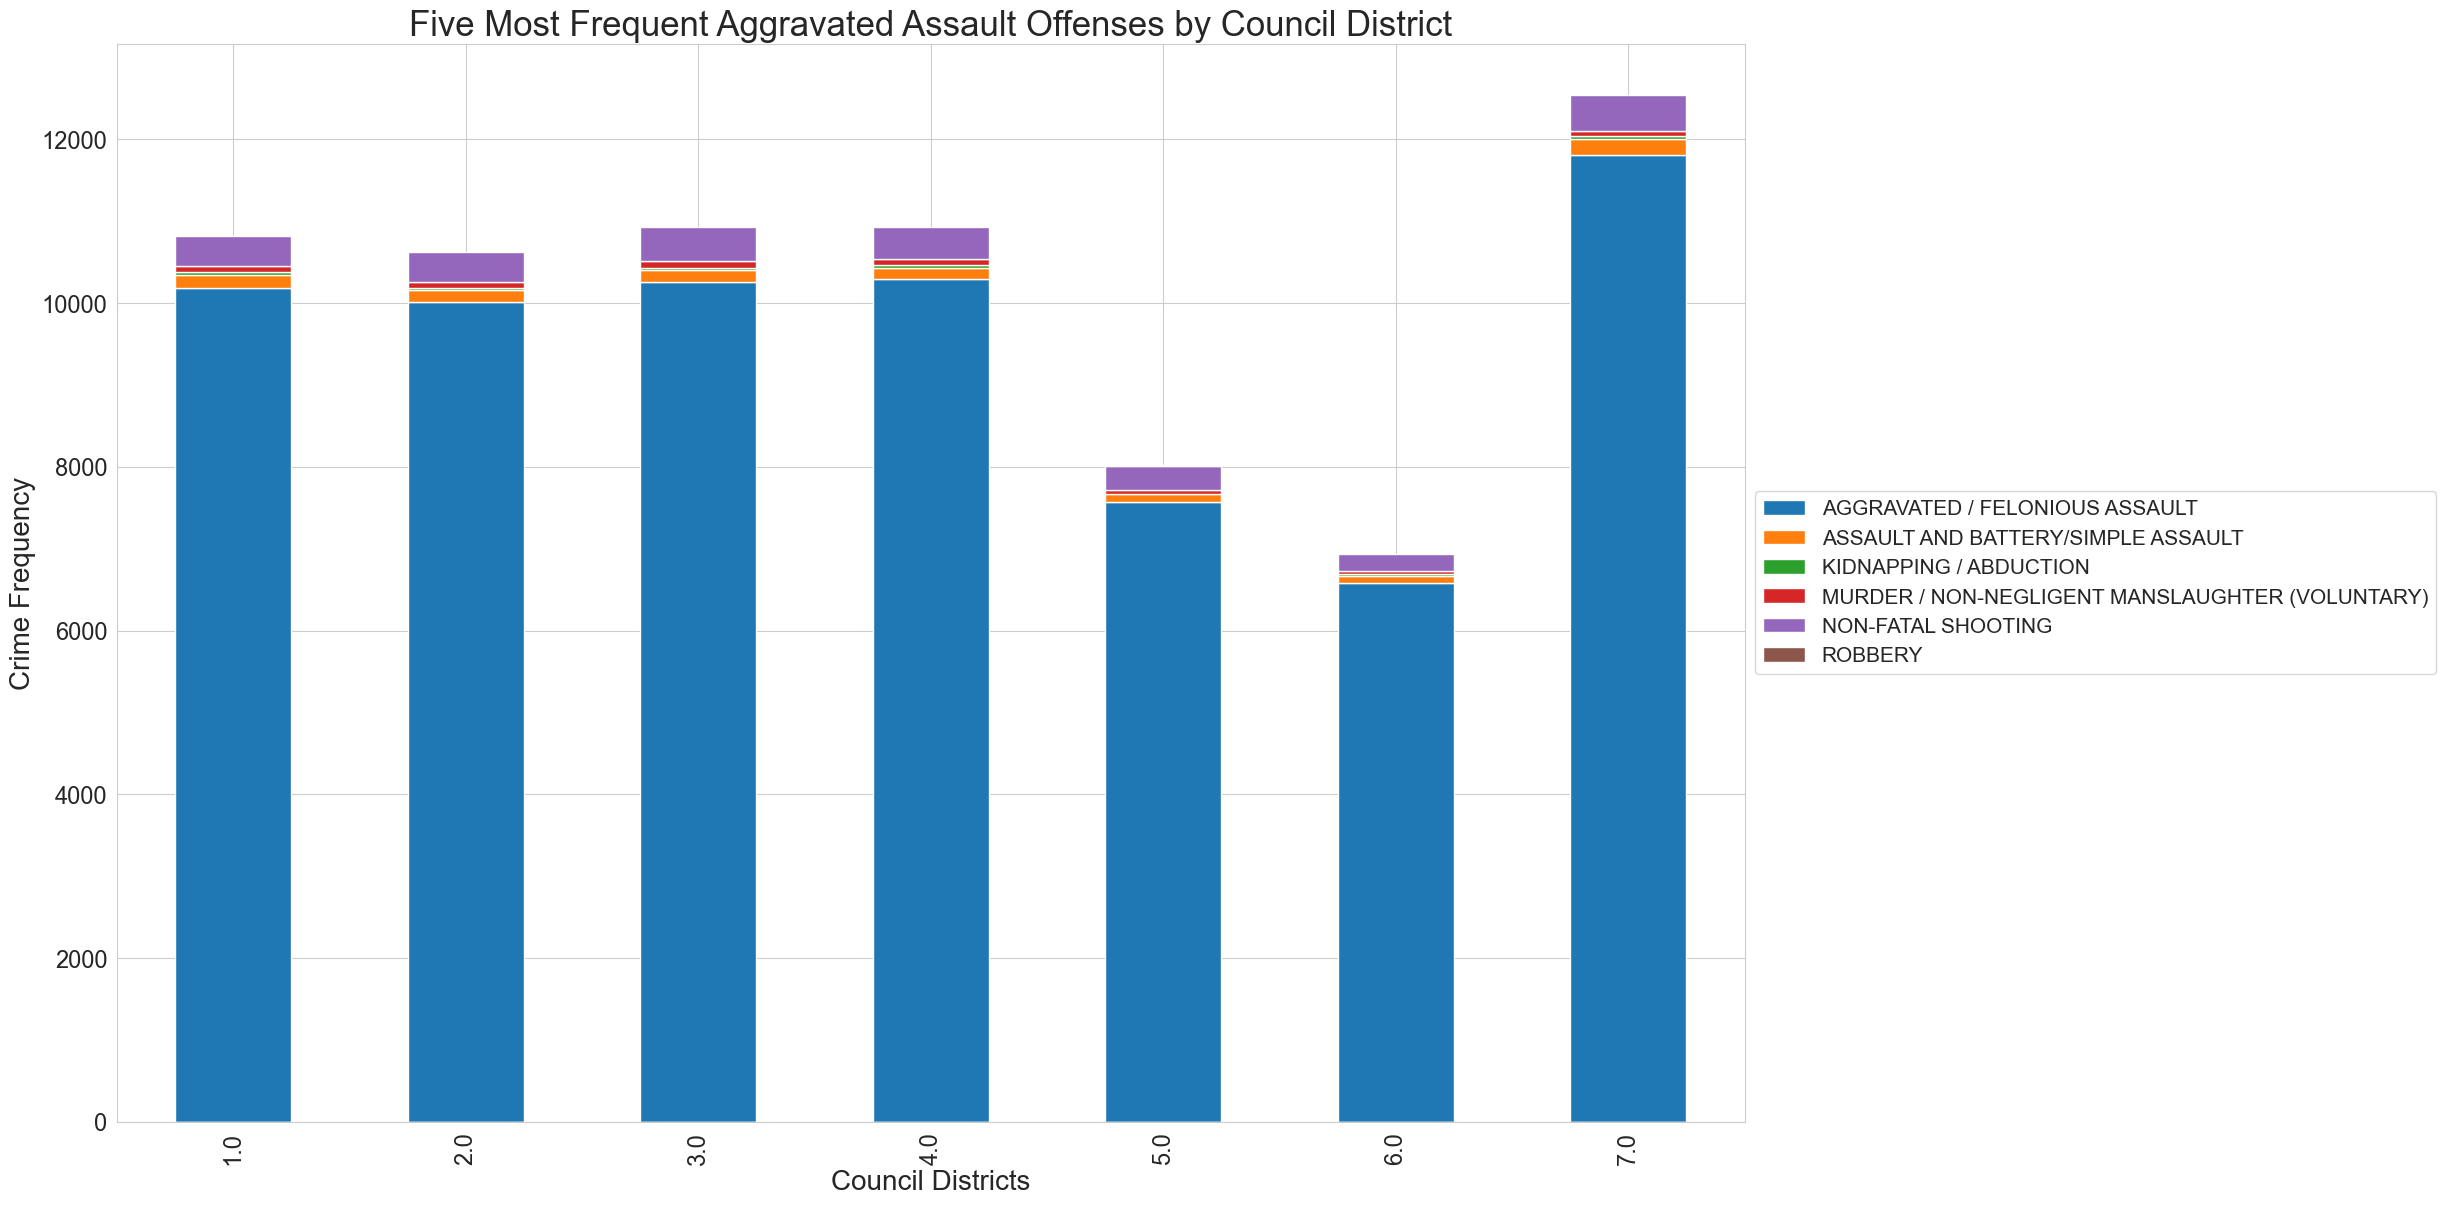

In [31]:
crimedata[crimedata.offense_category == "AGGRAVATED ASSAULT"].groupby(
    "council_district"
).offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(
    stacked=True, figsize=(21, 14)
)
plt.title(
    "Five Most Frequent Aggravated Assault Offenses by Council District", fontsize=25
)
plt.xlabel("Council Districts", fontsize=20)
plt.ylabel("Crime Frequency", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

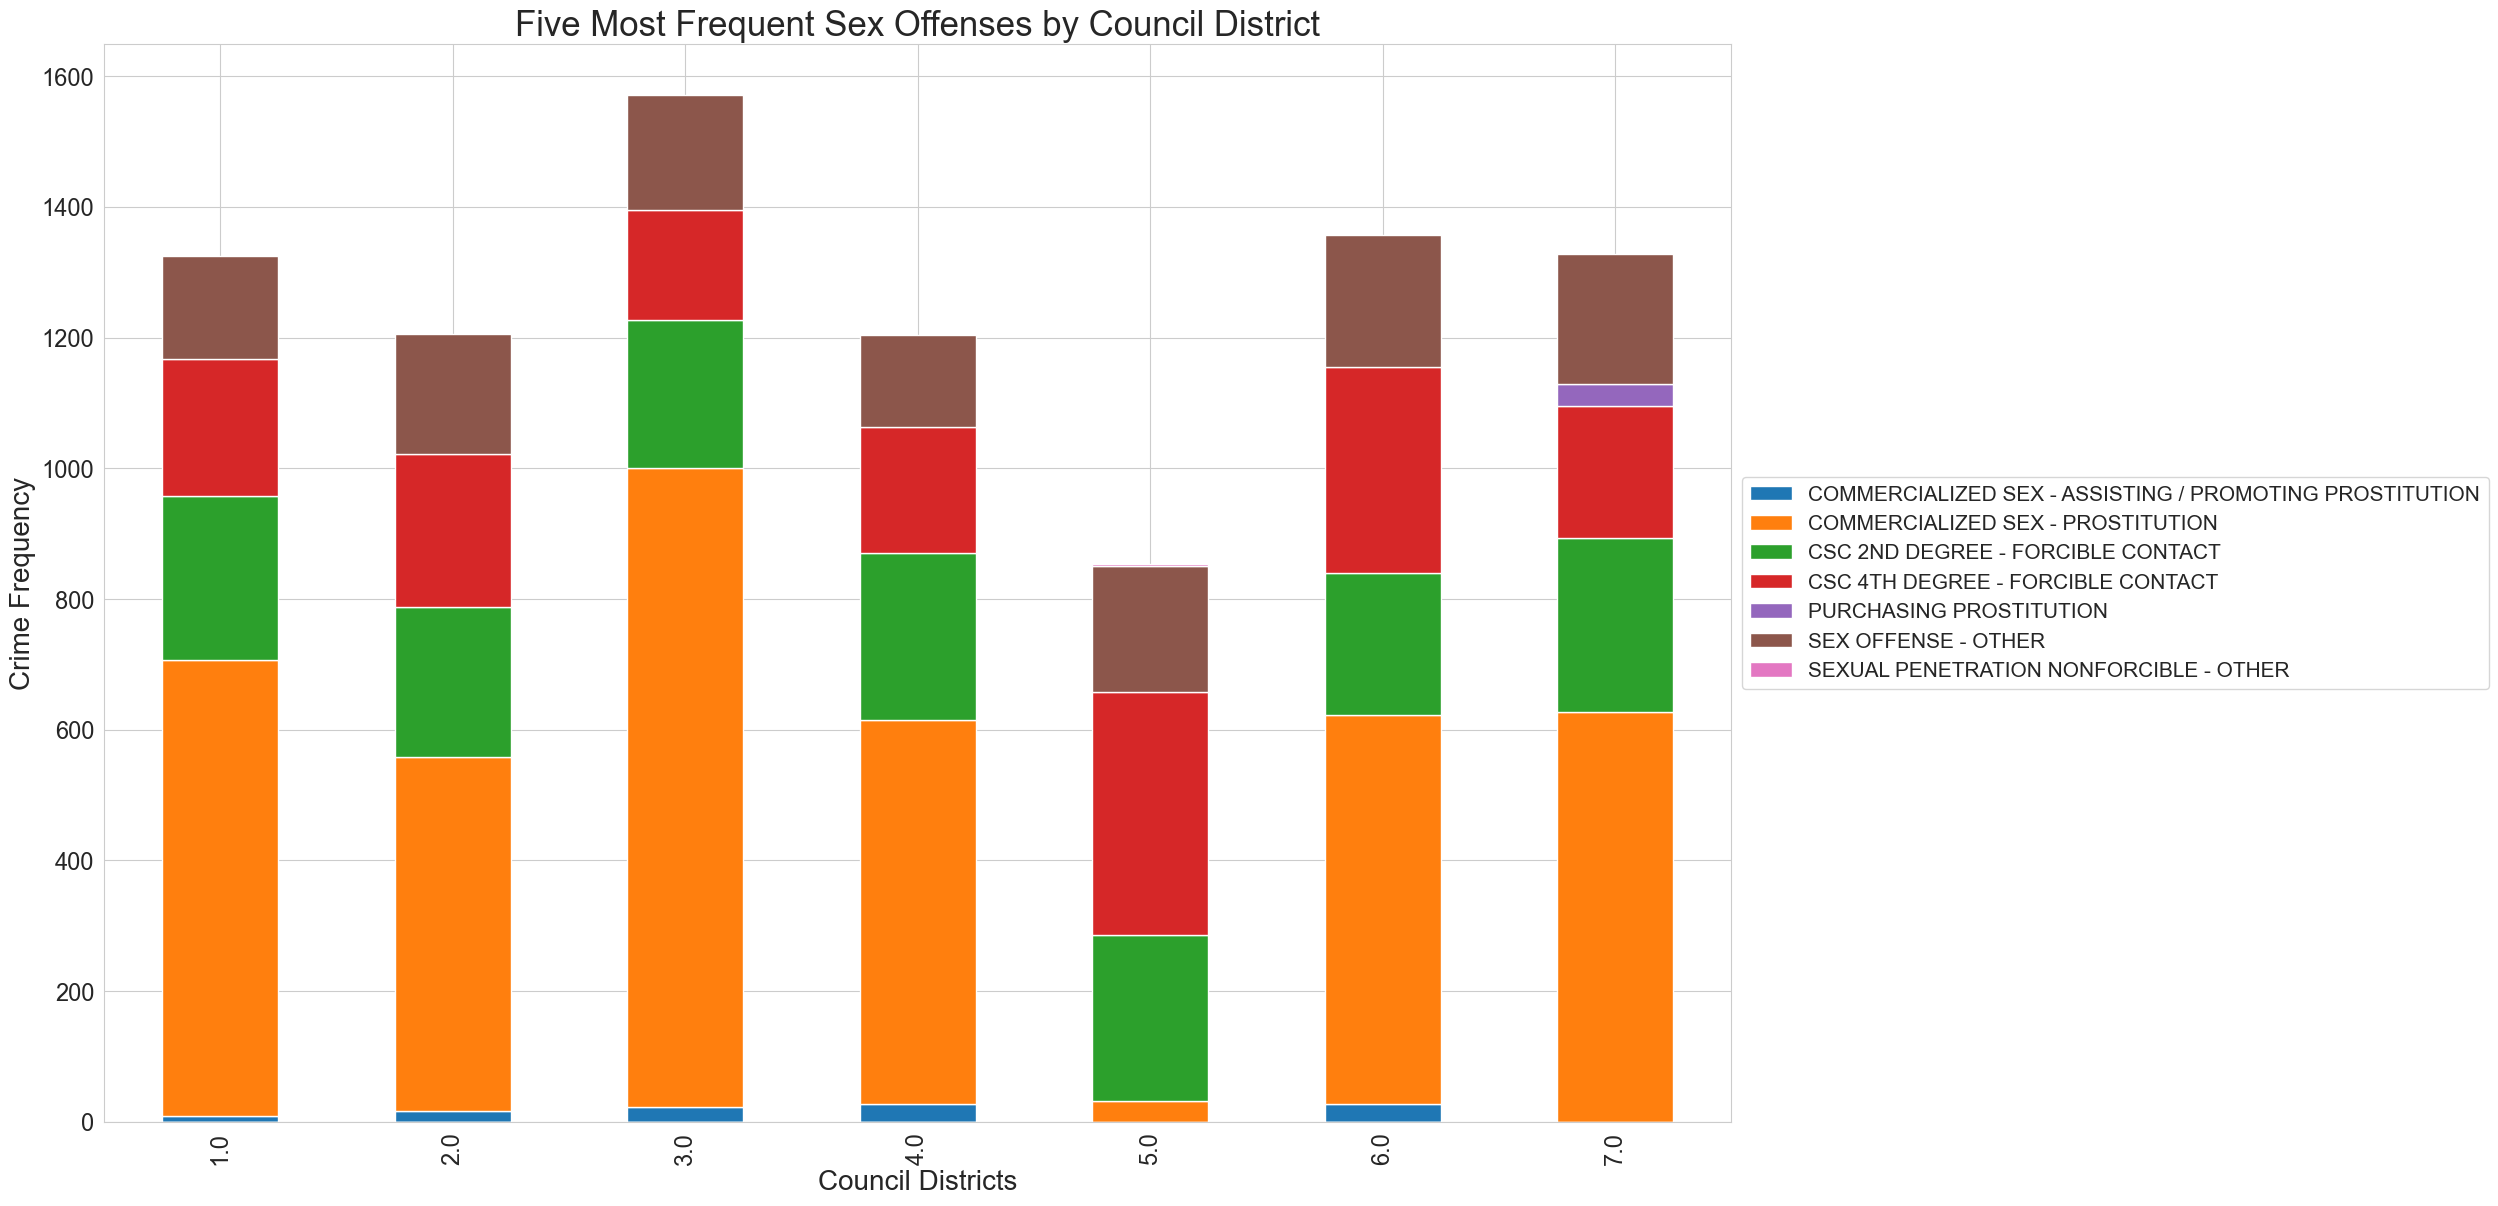

In [32]:
crimedata[crimedata.offense_category == "SEX OFFENSES"].groupby(
    "council_district"
).offense_description.apply(lambda x: x.value_counts().head(5)).unstack().plot.bar(
    stacked=True, figsize=(21, 14)
)
plt.title("Five Most Frequent Sex Offenses by Council District", fontsize=25)
plt.xlabel("Council Districts", fontsize=20)
plt.ylabel("Crime Frequency", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})

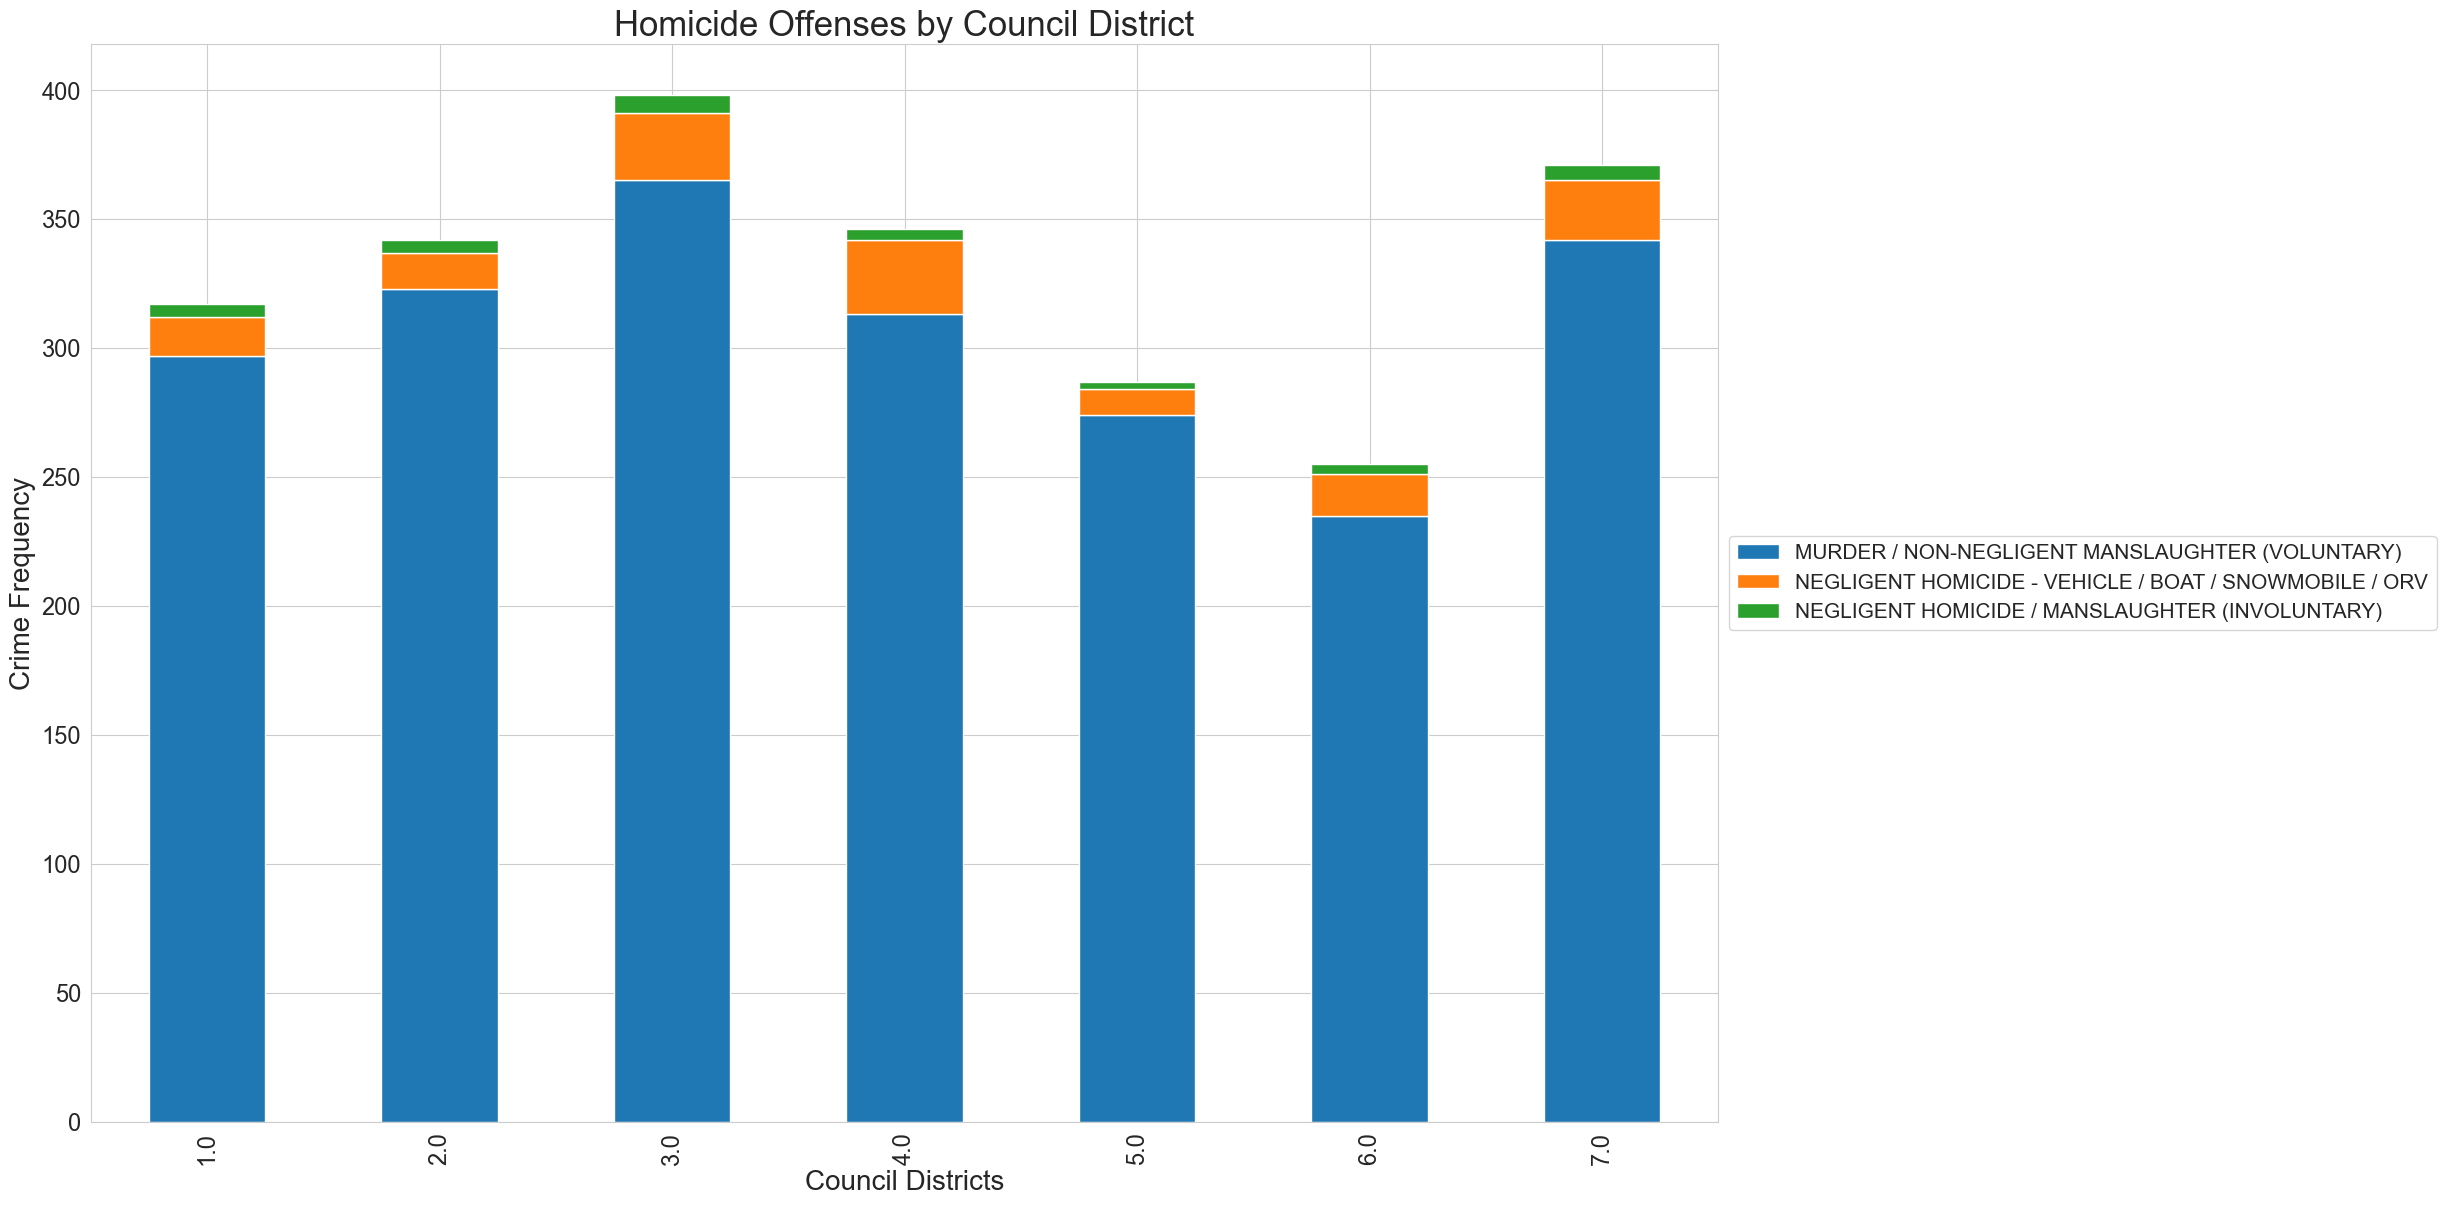

In [33]:
crimedata[crimedata.offense_category == "HOMICIDE"].groupby(
    "council_district"
).offense_description.apply(lambda x: x.value_counts()).unstack().plot.bar(
    stacked=True, figsize=(21, 14)
)
plt.title("Homicide Offenses by Council District", fontsize=25)
plt.xlabel("Council Districts", fontsize=20)
plt.ylabel("Crime Frequency", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size": 15})